Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Handling

In [ ]:
import pandas as pd

csv_file_path = '/content/drive/MyDrive/cleaned_labels.csv'

df = pd.read_csv(csv_file_path)

total_rows = len(df)

print(f"Total number of items (rows) in '{csv_file_path}': {total_rows}")

Total number of items (rows) in '/content/drive/MyDrive/cleaned_labels.csv': 8408


In [ ]:
import pandas as pd

csv_files = [
    '/content/drive/MyDrive/cutmixed_images/labelsX.csv',
    '/content/drive/MyDrive/cutmixed_images/labelsY.csv',
    '/content/drive/MyDrive/cutmixed_images/labelsZ.csv',
   '/content/drive/MyDrive/cleaned_labels.csv'
]

dataframes = []

for file in csv_files:
    df = pd.read_csv(file)

    if 'image' in df.columns and 'level' in df.columns:
        df = df.rename(columns={'image': 'filename', 'level': 'label'})
    elif 'filename' in df.columns and 'labels' in df.columns:
        df = df.rename(columns={'labels': 'label'})

    dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)
merged_df.to_csv('/content/drive/MyDrive/merged_labels.csv', index=False)

print("CSV files standardized and merged successfully.")

CSV files standardized and merged successfully.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/merged_labels.csv')
print(data.value_counts().sum())
print(data['label'].unique())
print(data['label'].value_counts().unique())
data.head()

9833
[4 3 1 0 2]
[6150 1283  800]


,filename,label
0,cutmixed_4_0.jpeg,4
1,cutmixed_4_1.jpeg,4
2,cutmixed_4_2.jpeg,4
3,cutmixed_4_3.jpeg,4
4,cutmixed_4_4.jpeg,4


In [ ]:
class_counts = merged_df['label'].value_counts()

print("Number of unique classes:", len(class_counts))
print("\nClass distribution:\n", class_counts)

Number of unique classes: 5

Class distribution:
 label
0    6150
2    1283
4     800
3     800
1     800
Name: count, dtype: int64


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/merged_labels.csv')
print(data.value_counts().sum())
print(data['label'].unique())
print(data['label'].value_counts().unique())
data.head()

9833
[4 3 1 0 2]
[6150 1283  800]


,filename,label
0,cutmixed_4_0.jpeg,4
1,cutmixed_4_1.jpeg,4
2,cutmixed_4_2.jpeg,4
3,cutmixed_4_3.jpeg,4
4,cutmixed_4_4.jpeg,4


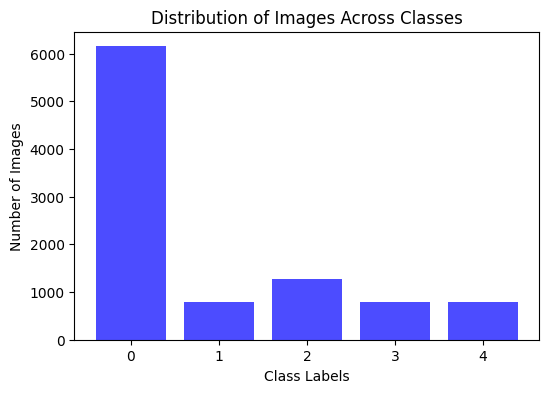

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


class_counts = data['label'].value_counts().sort_index()  # Get counts and sort by class labels


plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color='blue', alpha=0.7)

plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes')


plt.xticks(class_counts.index)

plt.show()


In [ ]:
print("Number of images in each class:")
for level, count in class_counts.items():
    print(f"Class {level}: {count} images")

Number of images in each class:
Class 0: 6150 images
Class 1: 800 images
Class 2: 1283 images
Class 3: 800 images
Class 4: 800 images


Class distribution after undersampling: {0: 800, 1: 800, 2: 800, 3: 800, 4: 800}
Resampled class counts: {0: 800, 1: 800, 2: 800, 3: 800, 4: 800}


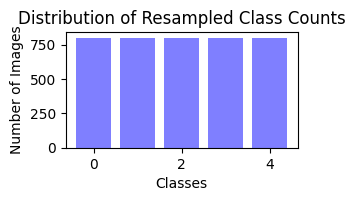

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

X = data['filename']
y = data['label']

X_array = X.values.reshape(-1, 1)
y_array = y.values

class_counts = {0: 6150, 1: 800, 2: 1283, 3: 800, 4: 800}
target_count = min(class_counts.values())

undersampler = RandomUnderSampler(sampling_strategy={label: target_count for label in class_counts.keys()})
X_under, y_under = undersampler.fit_resample(X_array, y_array)

print("Class distribution after undersampling:", dict(zip(*np.unique(y_under, return_counts=True))))

oversampler = RandomOverSampler(sampling_strategy={label: target_count for label in np.unique(y_under)})
X_resampled, y_resampled = oversampler.fit_resample(X_under, y_under)

unique, counts = np.unique(y_resampled, return_counts=True)
resampled_class_counts = dict(zip(unique, counts))
print("Resampled class counts:", resampled_class_counts)

plt.figure(figsize=(3, 1.5))
plt.bar(resampled_class_counts.keys(), resampled_class_counts.values(), color='blue', alpha=0.5)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Resampled Class Counts')
plt.show()


In [ ]:
new_X = []
for i in X_resampled:
  for j in i:
    new_X.append(j)

In [ ]:
y_resampled

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
resampled_data = {'filename': new_X,
        'label': y_resampled}

balanced_data = pd.DataFrame(resampled_data)


balanced_data.sample(10)

,filename,label
2841,16412_right,3
3683,12108_left,4
2223,13643_left,2
2105,11230_left,2
1251,19158_left,1
2782,13591_right,3
1570,15530_right,1
3283,cutmixed_4_241.jpeg,4
1199,19114_left,1
443,18574_right,0


In [ ]:
print(balanced_data.value_counts().sum())
print(balanced_data['label'].unique())
print(balanced_data['label'].value_counts().unique())

4000
[0 1 2 3 4]
[800]


In [ ]:
balanced_data['filename'] = balanced_data['filename']+'.jpeg'
balanced_data['label'] = balanced_data['label'].astype(str)
balanced_data.head()

,filename,label
0,17134_right.jpeg,0
1,16370_right.jpeg,0
2,13274_right.jpeg,0
3,16149_right.jpeg,0
4,16701_left.jpeg,0


In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 5

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(balanced_data, test_size=0.2, random_state=42)

Ben garaham's processing

In [ ]:
import cv2
import numpy as np
import os

def scale_radius(img, scale):
    """
    Scales the image to a specified radius.
    """
    x = img[img.shape[0] // 2, :, :].sum(1)
    r = (x > x.mean() / 10).sum() / 2
    s = scale * 1.0 / r
    return cv2.resize(img, (0, 0), fx=s, fy=s)

def subtract_local_average_color(img):
    """
    Subtracts the local average color.
    """
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0),  10), -4, 128)
    return img

def clip_image(img, target_size=(224, 224)):
    """
    Clips the image to 90% size to remove boundary effects, and optionally applies resizing and normalization.
    """
    img_a = scale_radius(img, 300)
    img = subtract_local_average_color(img_a)
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    center = (img.shape[1] // 2, img.shape[0] // 2)
    radius = int(300 * 0.9)
    cv2.circle(mask, center, radius, 255, -1)
    img_masked = cv2.bitwise_and(img,img, mask=mask)

    # # Resize the image
    img_resized = cv2.resize(img_masked, target_size)


    return img_resized


In [ ]:

import os
import pandas as pd

cutmixed_train = train[train['filename'].str.startswith('cutmixed_')]
cutmixed_val = val[val['filename'].str.startswith('cutmixed_')]

print("Total cutmixed_ images in train:", len(cutmixed_train))
print("Total cutmixed_ images in val:", len(cutmixed_val))

cutmixed_train['exists'] = cutmixed_train['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))
cutmixed_val['exists'] = cutmixed_val['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))

missing_train_files = cutmixed_train[~cutmixed_train['exists']]
missing_val_files = cutmixed_val[~cutmixed_val['exists']]

print("Missing train files:", missing_train_files['filename'].tolist())
print("Missing val files:", missing_val_files['filename'].tolist())

Total cutmixed_ images in train: 1152
Total cutmixed_ images in val: 273
Missing train files: ['cutmixed_4_70.jpeg.jpeg', 'cutmixed_class3_215.jpeg.jpeg', 'cutmixed_29.jpeg.jpeg', 'cutmixed_4_407.jpeg.jpeg', 'cutmixed_4_250.jpeg.jpeg', 'cutmixed_class3_483.jpeg.jpeg', 'cutmixed_77.jpeg.jpeg', 'cutmixed_4_153.jpeg.jpeg', 'cutmixed_4_109.jpeg.jpeg', 'cutmixed_4_307.jpeg.jpeg', 'cutmixed_class3_6.jpeg.jpeg', 'cutmixed_4_408.jpeg.jpeg', 'cutmixed_189.jpeg.jpeg', 'cutmixed_class3_54.jpeg.jpeg', 'cutmixed_4_64.jpeg.jpeg', 'cutmixed_4_148.jpeg.jpeg', 'cutmixed_4_468.jpeg.jpeg', 'cutmixed_4_494.jpeg.jpeg', 'cutmixed_4_438.jpeg.jpeg', 'cutmixed_4_537.jpeg.jpeg', 'cutmixed_6.jpeg.jpeg', 'cutmixed_4_217.jpeg.jpeg', 'cutmixed_class3_186.jpeg.jpeg', 'cutmixed_class3_130.jpeg.jpeg', 'cutmixed_class3_105.jpeg.jpeg', 'cutmixed_4_358.jpeg.jpeg', 'cutmixed_4_351.jpeg.jpeg', 'cutmixed_class3_210.jpeg.jpeg', 'cutmixed_class3_203.jpeg.jpeg', 'cutmixed_4_271.jpeg.jpeg', 'cutmixed_class3_465.jpeg.jpeg', 'cut

<ipython-input-19-77bcb2fc647d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_train['exists'] = cutmixed_train['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))
<ipython-input-19-77bcb2fc647d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_val['exists'] = cutmixed_val['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))


In [ ]:
cutmixed_train['filename'] = cutmixed_train['filename'].apply(lambda x: os.path.basename(x))
cutmixed_val['filename'] = cutmixed_val['filename'].apply(lambda x: os.path.basename(x))


<ipython-input-20-6262e7331acc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_train['filename'] = cutmixed_train['filename'].apply(lambda x: os.path.basename(x))
<ipython-input-20-6262e7331acc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_val['filename'] = cutmixed_val['filename'].apply(lambda x: os.path.basename(x))


In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

def check_filenames(df, directory):
    missing_files = [f for f in df['filename'] if not os.path.exists(os.path.join(directory, f))]
    if missing_files:
        print(f"Missing files: {len(missing_files)}")
        print("Sample missing files:", missing_files[:5])
    return len(missing_files) == 0

image_directory = '/content/drive/MyDrive/train_dr'

if not check_filenames(train, image_directory) or not check_filenames(val, image_directory):
    print("Some image files are missing. Please verify the paths and filenames.")
else:
    print("All files are present.")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("Images validated and generators created successfully.")


Missing files: 1152
Sample missing files: ['cutmixed_4_70.jpeg.jpeg', 'cutmixed_class3_215.jpeg.jpeg', 'cutmixed_29.jpeg.jpeg', 'cutmixed_4_407.jpeg.jpeg', 'cutmixed_4_250.jpeg.jpeg']
Some image files are missing. Please verify the paths and filenames.
Found 2048 validated image filenames belonging to 5 classes.
Found 527 validated image filenames belonging to 5 classes.
Images validated and generators created successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1152 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 273 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
# Correct filenames by removing extra extensions
train['filename'] = train['filename'].apply(lambda x: x.replace('.jpeg.jpeg', '.jpeg'))
val['filename'] = val['filename'].apply(lambda x: x.replace('.jpeg.jpeg', '.jpeg'))

# Re-check if files exist after correcting filenames
print("Checking corrected filenames...")
missing_train_files = [f for f in train['filename'] if not os.path.exists(os.path.join(image_directory, f))]
missing_val_files = [f for f in val['filename'] if not os.path.exists(os.path.join(image_directory, f))]

print(f"Missing files in train after correction: {len(missing_train_files)}")
print(f"Missing files in val after correction: {len(missing_val_files)}")

if missing_train_files:
    print("Sample missing train files:", missing_train_files[:5])
if missing_val_files:
    print("Sample missing val files:", missing_val_files[:5])


Checking corrected filenames...
Missing files in train after correction: 0
Missing files in val after correction: 0


In [ ]:
# Filter cutmixed_ images
cutmixed_train = train[train['filename'].str.startswith('cutmixed_')]
cutmixed_val = val[val['filename'].str.startswith('cutmixed_')]

# Print counts to verify
print(f"Total cutmixed_ images in train: {len(cutmixed_train)}")
print(f"Total cutmixed_ images in val: {len(cutmixed_val)}")

# Combine the filtered cutmixed_ images with the original DataFrames
train_combined = pd.concat([train, cutmixed_train]).drop_duplicates(subset='filename')
val_combined = pd.concat([val, cutmixed_val]).drop_duplicates(subset='filename')

# Print counts to verify combined DataFrames
print(f"Total images in combined train DataFrame: {len(train_combined)}")
print(f"Total images in combined val DataFrame: {len(val_combined)}")

Total cutmixed_ images in train: 1152
Total cutmixed_ images in val: 273
Total images in combined train DataFrame: 3200
Total images in combined val DataFrame: 800


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_combined,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_combined,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("Images validated and generators created successfully.")


Found 3200 validated image filenames belonging to 5 classes.
Found 800 validated image filenames belonging to 5 classes.
Images validated and generators created successfully.


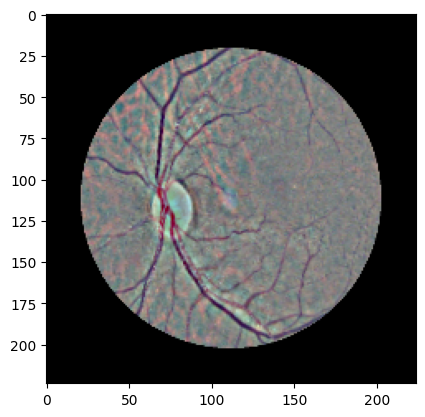

In [ ]:
plt.imshow(next(train_generator)[0][0])

In [ ]:
import os

checkpoint_dir = '/content/drive/MyDrive/dense_ensemb_cut/'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

DenseNet169 Model tarining

In [ ]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint


densenet_169 = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in densenet_169.layers:
    layer.trainable = False

x = densenet_169.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

NUM_CLASSES = 5
densenet_169_pred = Dense(NUM_CLASSES, activation='softmax')(x)

best_model_DenseNet169 = Model(inputs=densenet_169.input, outputs=densenet_169_pred)

best_model_DenseNet169.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join('/content/drive/MyDrive/dense_ensemb_cut/dense169_1.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-8),
    checkpoint_callback
]


history_i = best_model_DenseNet169.fit(train_generator, validation_data=val_generator, epochs=100, batch_size=16, callbacks=callbacks)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3039 - loss: 20.5520

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1648s 15s/step - accuracy: 0.3041 - loss: 20.5408 - val_accuracy: 0.3550 - val_loss: 16.7761 - learning_rate: 1.0000e-04
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 440s 4s/step - accuracy: 0.3759 - loss: 16.5337 - val_accuracy: 0.3925 - val_loss: 14.3377 - learning_rate: 1.0000e-04
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 417s 4s/step - accuracy: 0.4079 - loss: 14.2891 - val_accuracy: 0.3887 - val_loss: 12.7932 - learning_rate: 1.0000e-04
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 440s 4s/step - accuracy: 0.4303 - loss: 12.8587 - val_accuracy: 0.4062 - val_loss: 11.9559 - learning_rate: 1.0000e-04
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 423s 4s/step - accuracy: 0.4337 - loss: 11.9605 - val_accuracy: 0.4112 - val_loss: 11.2573 - learning_rate: 1.0000e-04
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 452s 4s/step - accuracy: 0.4397 - loss: 11.3250 - val_accuracy: 0.4538 - val_loss: 10.7198 - learning_rate: 1.0000e-04
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 435s 4s/s

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

# Load the saved model
densenet_model = load_model('/content/drive/MyDrive/dense_ensemb_cut/dense169_1.keras')

# Compile the model
densenet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join('/content/drive/MyDrive/dense_ensemb_cut/dense169_2.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-8),
    checkpoint_callback
]


history_i = densenet_model.fit(train_generator, validation_data=val_generator, epochs=80, batch_size=16, callbacks=callbacks)


Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1899s 18s/step - accuracy: 0.4870 - loss: 6.2307 - val_accuracy: 0.5075 - val_loss: 5.6845 - learning_rate: 1.0000e-04
Epoch 2/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 434s 4s/step - accuracy: 0.5088 - loss: 5.6989 - val_accuracy: 0.5113 - val_loss: 5.3329 - learning_rate: 1.0000e-04
Epoch 3/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 432s 4s/step - accuracy: 0.5019 - loss: 5.3760 - val_accuracy: 0.5013 - val_loss: 5.1320 - learning_rate: 1.0000e-04
Epoch 4/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 443s 4s/step - accuracy: 0.4979 - loss: 5.2001 - val_accuracy: 0.5088 - val_loss: 4.9042 - learning_rate: 1.0000e-04
Epoch 5/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 425s 4s/step - accuracy: 0.4879 - loss: 5.0465 - val_accuracy: 0.5225 - val_loss: 4.7941 - learning_rate: 1.0000e-04
Epoch 6/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 427s 4s/step - accuracy: 0.5389 - loss: 4.7903 - val_accuracy: 0.5263 - val_loss: 4.6350 - learning_rate: 1.0000e-04
Epoch 7/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 433s 4s/step - accuracy: 0.

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

# Load the saved model
densenet_model = load_model('/content/drive/MyDrive/dense_ensemb_cut/dense169_2.keras')

# Compile the model
densenet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join('/content/drive/MyDrive/dense_ensemb_cut/dense169_3.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-8),
    checkpoint_callback
]


history_i = densenet_model.fit(train_generator, validation_data=val_generator, epochs=60, batch_size=16, callbacks=callbacks)


Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3158s 30s/step - accuracy: 0.5379 - loss: 2.7990 - val_accuracy: 0.5312 - val_loss: 2.6601 - learning_rate: 1.0000e-04
Epoch 2/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 433s 4s/step - accuracy: 0.5450 - loss: 2.6481 - val_accuracy: 0.5188 - val_loss: 2.6406 - learning_rate: 1.0000e-04
Epoch 3/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 428s 4s/step - accuracy: 0.5463 - loss: 2.5840 - val_accuracy: 0.5213 - val_loss: 2.5729 - learning_rate: 1.0000e-04
Epoch 4/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 480s 5s/step - accuracy: 0.5582 - loss: 2.4790 - val_accuracy: 0.5250 - val_loss: 2.5358 - learning_rate: 1.0000e-04
Epoch 5/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 435s 4s/step - accuracy: 0.5711 - loss: 2.4090 - val_accuracy: 0.5387 - val_loss: 2.4183 - learning_rate: 1.0000e-04
Epoch 6/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 474s 5s/step - accuracy: 0.5693 - loss: 2.3508 - val_accuracy: 0.5587 - val_loss: 2.3793 - learning_rate: 1.0000e-04
Epoch 7/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 407s 4s/step - accuracy: 0.

In [ ]:
val_loss, val_accuracy =  densenet_model.evaluate(val_generator, steps=len(val_generator))

print("Validation Accuracy:", val_accuracy)
print("Validation Loss:", val_loss)

25/25 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.5213 - loss: 1.6374
Validation Accuracy: 0.5174999833106995
Validation Loss: 1.6236746311187744


Evaluation

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# # Load the saved model
# model_save_path = '/content/drive/MyDrive/ensemble_model_cut/inception_V3_c3.keras'
# inception_model = load_model(model_save_path)

batch_size = 16
all_predictions = []

true_Y_labels = []

for i in range(len(val_generator)):
    x_batch, y_batch = next(val_generator)
    batch_predictions = densenet_model.predict(x_batch)
    all_predictions.append(batch_predictions)
    true_Y_labels.append(y_batch)
pred_Y = np.concatenate(all_predictions)
true_Y = np.concatenate(true_Y_labels)

pred_Y_labels = np.argmax(pred_Y, axis=1)
true_Y_labels = np.argmax(true_Y, axis=1)

report = classification_report(true_Y_labels, pred_Y_labels, target_names=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])

print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
              precision    recall  f1-score   supp

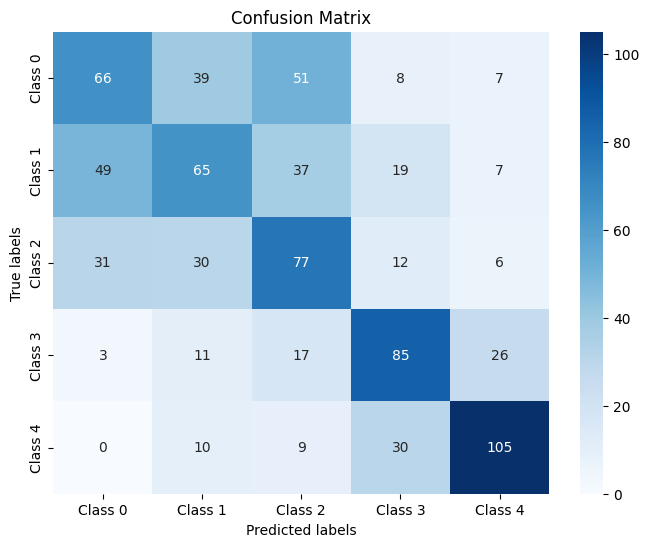

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_Y_labels, pred_Y_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()